# I. Introduction

**Objective of the project**: Develop a predictive model to determine whether a video contains a **claim** or offers an **opinion**. With the help of this model, content moderation team can mitigate misinformation in videos on the TikTok platform more efficiently.

**Claims** refer to information that is either unsourced or from an unverified source. <br />For example, “It is said that drinking coffee every day can reduce the risk of heart disease by 40%.”

**Opinions** refer to the personal beliefs or thoughts of a group or an individual.  <br />For example, “I believe that reading fiction is the best way to develop empathy.”

This dataset contains information about each video’s duration in seconds, view count, comment count, and more. <br />First, an **Exploratory Data Analysis (EDA)** is conducted to examine the dataset’s characteristics. Next, **statistical tests** are performed to investigate whether there are significant differences between the attributes of “claim” and “opinion” videos. Following that, a **random forest model** and a **gradient boosting model** will be constructed to train the data, and their predictive performance will be compared. Finally, the model with better predictive performance will be selected for future classification tasks.

In [82]:
'''

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

'''

'\n\n# This Python 3 environment comes with many helpful analytics libraries installed\n# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python\n# For example, here\'s several helpful packages to load\n\nimport numpy as np # linear algebra\nimport pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\n\n# Input data files are available in the read-only "../input/" directory\n# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory\n\nimport os\nfor dirname, _, filenames in os.walk(\'/kaggle/input\'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n\n# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" \n# You can also write temporary files to /kaggle/temp/, but they won\'t be saved outside of the current session\n\n'

In [83]:
# df = pd.read_csv('/kaggle/input/tiktok-dataset/tiktok_dataset.csv')

In [84]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# Import packages for statistical test
from scipy import stats

# Import packages for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import packages for data modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

In [85]:
df = pd.read_csv('/Users/user/Desktop/projects/tiktok_classification/tiktok_dataset.csv')

## Data Dictionary


| Column Name              | Type  | Description                                                                                                                                         |
|--------------------------|-------|-----------------------------------------------------------------------------------------------------------------------------------------------------|
| `#`                      | int   | TikTok assigned number for video with claim/opinion.                                                                                                 |
| `claim_status`           | obj   | Whether the published video has been identified as an “opinion” or a “claim.” In this dataset, an “opinion” refers to an individual’s or group’s personal beliefs or thoughts. A “claim” refers to information that is either unsourced or from an unverified source. |
| `video_id`               | int   | Random identifying number assigned to a video upon publication on TikTok.                                                                            |
| `video_duration_sec`     | int   | How long the published video is measured in seconds.                                                                                                 |
| `video_transcription_text` | obj | Transcribed text of the words spoken in the published video.                                                                                         |
| `verified_status`        | obj   | Indicates the status of the TikTok user who published the video in terms of their verification, either “verified” or “not verified.”                  |
| `author_ban_status`      | obj   | Indicates the status of the TikTok user who published the video in terms of their permissions: “active,” “under scrutiny,” or “banned.”               |
| `video_view_count`       | float | The total number of times the published video has been viewed.                                                                                       |
| `video_like_count`       | float | The total number of times the published video has been liked by other users.                                                                         |
| `video_share_count`      | float | The total number of times the published video has been shared by other users.                                                                        |
| `video_download_count`   | float | The total number of times the published video has been downloaded by other users.                                                                    |
| `video_comment_count`    | float | The total number of comments on the published video.                                                                                                 |


# II. Exploratory Data Analysis (EDA)

Let’s start by conducting Exploratory Data Analysis (EDA) and visualizing the dataset to better understand its characteristics.

###  Data Inspection

In [86]:
# Examine column names and first 10 rows
df.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


In [87]:
# Check for attribute data type and null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [88]:
# Get the number of row and column
df.shape

(19382, 12)

The dataset contains a total of 19,382 rows, but some columns have only 19,084 non-null values. This indicates the presence of missing values that will need to be addressed during the data cleaning process.

In [89]:
# Get summary statistics
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [90]:
# Check for missing values
df.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [91]:
# Remove missing values and check again
df = df.dropna(axis = 0)
df.isna().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

In [92]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

In [93]:
# Recheck the shape of the dataset
df.shape

(19084, 12)

### Investigate Variables

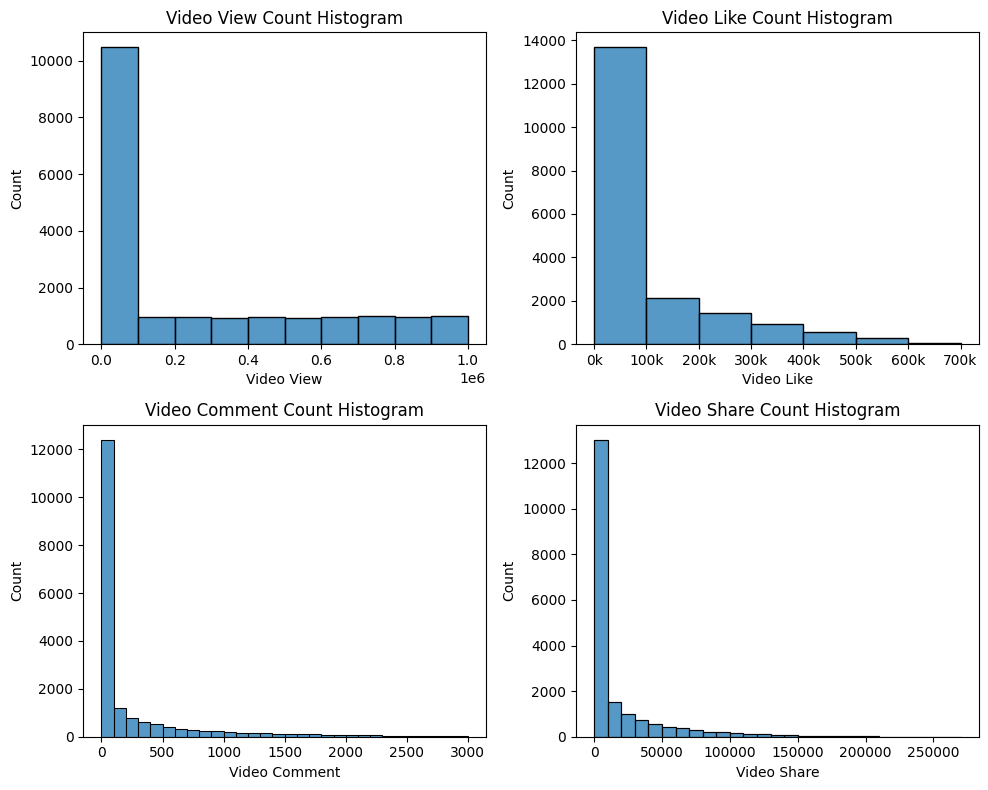

In [94]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Video view count histogram
sns.histplot(df['video_view_count'], bins=range(0, (10**6 + 1), 10**5), ax=axes[0, 0])
axes[0, 0].set_title('Video View Count Histogram')
axes[0, 0].set_xlabel('Video View')

# Video like count histogram
sns.histplot(df['video_like_count'], bins=range(0, (7*10**5 + 1), 10**5), ax=axes[0, 1])
axes[0, 1].xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))
axes[0, 1].set_title('Video Like Count Histogram')
axes[0, 1].set_xlabel('Video Like')

# Video comment count histogram
sns.histplot(df['video_comment_count'], bins=range(0, (3001), 100), ax=axes[1, 0])
axes[1, 0].set_title('Video Comment Count Histogram')
axes[1, 0].set_xlabel('Video Comment')

# Video share count histogram
sns.histplot(df['video_share_count'], bins=range(0, (270001), 10000), ax=axes[1, 1])
axes[1, 1].set_title('Video Share Count Histogram')
axes[1, 1].set_xlabel('Video Share')

plt.tight_layout()

#plt.savefig('video_metrics_histograms.png', dpi=200)
plt.show()

The histograms reveal that the distribution of views, likes, comments, and shares is uneven across videos. The right-skewed histograms indicate that the majority of videos have lower numbers of views, likes, comments, and shares.

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64


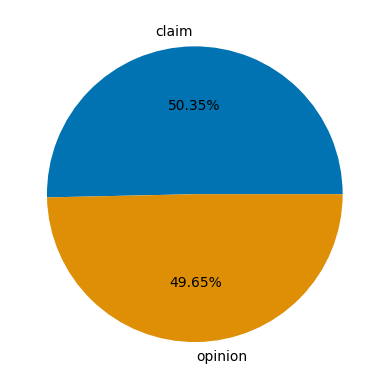

In [95]:
# Find out the number of "claim" and "opinion" videos
print(df['claim_status'].value_counts())

# Visualize the proportion of "claim" and "opinion" videos
palette_color = sns.color_palette('colorblind') 
plt.pie(df['claim_status'].value_counts(), labels=df['claim_status'].value_counts().index, colors=palette_color, autopct='%.02f%%')

# Save the plot as an image file
#plt.savefig('proportion pie chart.png', dpi=300)
plt.show()

The pie chart shows that the numbers of claim videos and opinion videos are quite similar, with each type comprising roughly 50% of the entire dataset.

In [96]:
# Find out the mean and median view count with different claim status
df.groupby(['claim_status']).agg({'video_view_count':['mean', 'median']}).reset_index()

claim_status video_view_count          
                           mean    median
0        claim    501029.452748  501555.0
1      opinion      4956.432250    4953.0

In [97]:
# Find out the mean and median like count with different claim status
df.groupby(['claim_status']).agg({'video_like_count':['mean', 'median']}).reset_index()

claim_status video_like_count          
                           mean    median
0        claim    166373.331182  123649.0
1      opinion      1092.729844     823.0

In [98]:
# Find out the mean and median comment count with different claim status
df.groupby(['claim_status']).agg({'video_comment_count':['mean', 'median']}).reset_index()

claim_status video_comment_count       
                              mean median
0        claim          691.164863  286.0
1      opinion            2.697446    1.0

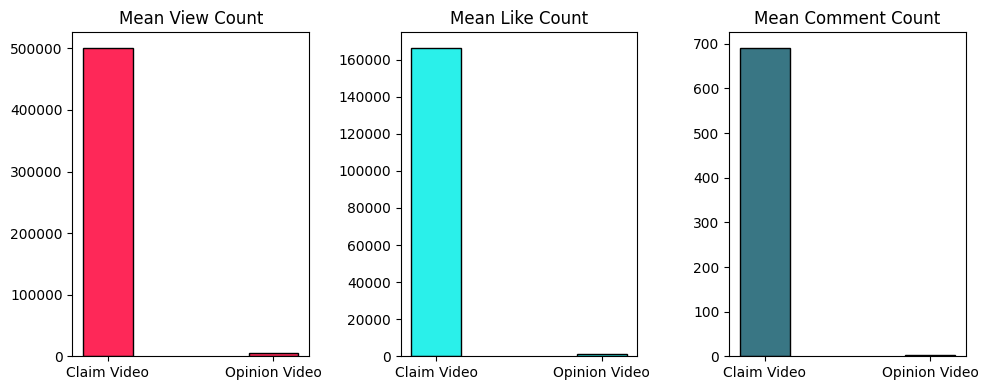

In [99]:
claims = df[df['claim_status'] == 'claim']
opinions = df[df['claim_status'] == 'opinion']
barwidth = 0.3
name = ('Claim Video', 'Opinion Video')

# Mean view/like/comment count
v_count = [claims['video_view_count'].mean(), opinions['video_view_count'].mean()]
l_count = [claims['video_like_count'].mean(), opinions['video_like_count'].mean()]
c_count = [claims['video_comment_count'].mean(), opinions['video_comment_count'].mean()]

plt.figure(figsize=(10, 4)) 
# Subplot 1: Mean View Count
plt.subplot(1, 3, 1)
plt.bar(name, v_count, width=barwidth, edgecolor='black', color = '#fe2858')
plt.title('Mean View Count')

# Subplot 2: Mean Like Count
plt.subplot(1, 3, 2)
plt.bar(name, l_count, width=barwidth, edgecolor='black', color = '#2af0ea')
plt.title('Mean Like Count')

# Subplot 3: Mean Comment Count
plt.subplot(1, 3, 3)
plt.bar(name, c_count, width=barwidth, edgecolor='black', color = '#397684')
plt.title('Mean Comment Count')

plt.tight_layout()

#plt.savefig('mean_engaagement_compare.png', dpi=300)
plt.show()

As the bar plots show, claim videos have higher view counts, like counts, and comment counts compared to opinion videos.

In [100]:
# Investigate the relationship between claim status and author ban status
df.groupby(['claim_status', 'author_ban_status']).count()[['#']]

#
claim_status author_ban_status      
claim        active             6566
             banned             1439
             under review       1603
opinion      active             8817
             banned              196
             under review        463

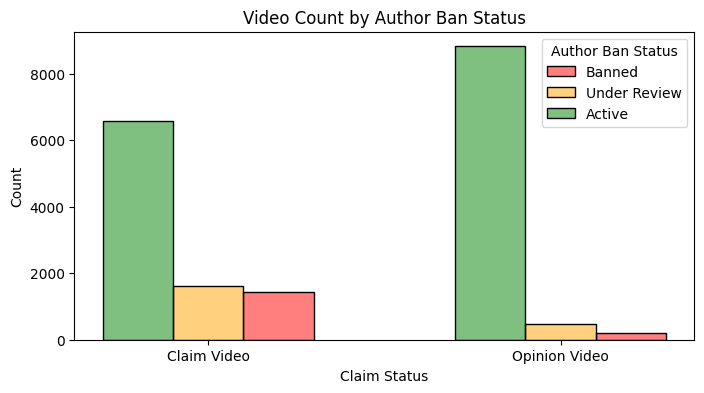

In [101]:
plt.figure(figsize=(8,4))
sns.histplot(df, x='claim_status', hue='author_ban_status',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.6,
             palette={'active':'green', 'under review':'orange', 'banned':'red'},
             alpha=0.5)

# Layout
plt.xticks([0, 1], ['Claim Video', 'Opinion Video'])
plt.legend(title='Author Ban Status', labels=['Banned', 'Under Review', 'Active'])
plt.xlabel('Claim Status')
plt.title('Video Count by Author Ban Status')

#plt.savefig('Video count by author status.png', dpi=300)
plt.show()

Although claimed and opinion videos each make up 50% of the dataset, as the bar plot shows, active authors are fewer in claimed videos compared to opinion videos. However, for both banned and under-review authors, claimed videos outnumber opinion videos.

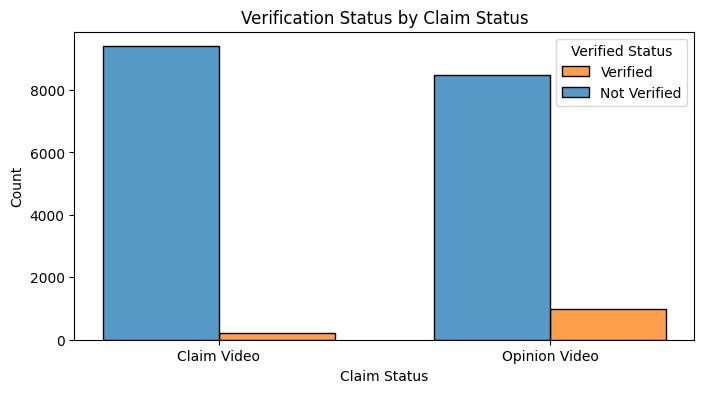

In [102]:
# Visualize the relationship between claim status and verification status
plt.figure(figsize=(8,4))
sns.histplot(data=df,
             x='claim_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.7)

plt.legend(title='Verified Status', labels=['Verified', 'Not Verified'])
plt.xticks([0, 1], ['Claim Video', 'Opinion Video'])
plt.xlabel('Claim Status')
plt.title('Verification Status by Claim Status')

plt.savefig('Verification Status by Claim Status', dpi=300)
plt.show()

Regardless of claim status, most videos are not verified. However, if a video is verified, it is more likely to be an opinion video.

In [103]:
# Create engagement rate metrics, including likes per view, comments per view, and shares per view
df['likes_per_view'] = df['video_like_count'] / df['video_view_count']
df['comment_per_view'] = df['video_comment_count'] / df['video_view_count']
df['share_per_view'] = df['video_share_count'] / df['video_view_count']

In [104]:
# Examine the engagement rate metrics grouped by claim status
engagement_rate = df.groupby(['claim_status']).agg({
    'likes_per_view': ['count', 'mean'],
    'comment_per_view':['mean'],
    'share_per_view':['mean']
}).reset_index()
engagement_rate

claim_status likes_per_view           comment_per_view share_per_view
                        count      mean             mean           mean
0        claim           9608  0.331610         0.001386       0.065867
1      opinion           9476  0.219802         0.000516       0.043699

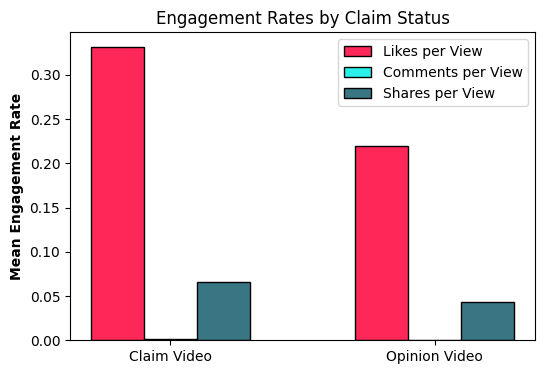

In [105]:
# Extract the mean values
likes_mean = engagement_rate[('likes_per_view', 'mean')]
comments_mean = engagement_rate[('comment_per_view', 'mean')]
shares_mean = engagement_rate[('share_per_view', 'mean')]

barwidth = 0.20
plt.figure(figsize=(6, 4))

# The position of bars
r1 = np.arange(len(likes_mean))
r2 = [x + barwidth for x in r1]
r3 = [x + barwidth for x in r2]

# Create bars
plt.bar(r1, likes_mean, color='#fe2858', width=barwidth, edgecolor='black', label='Likes per View')
plt.bar(r2, comments_mean, color='#2af0ea', width=barwidth, edgecolor='black', label='Comments per View')
plt.bar(r3, shares_mean, color='#397684', width=barwidth, edgecolor='black', label='Shares per View')

# Layout
plt.ylabel('Mean Engagement Rate', fontweight='bold')
plt.xticks([r + barwidth for r in range(len(likes_mean))], ['Claim Video', 'Opinion Video'])
plt.title('Engagement Rates by Claim Status')
plt.legend()

#plt.savefig('Engagement Rates by Claim Status', dpi=300)
plt.show()

The table and bar plot indicate that claim videos have higher engagement rates, with more likes per view, shares per view, and comments per view. However, it’s important to note that for both types of videos, the comments per view rate is below 0.01.

In [106]:
# Create a `text_length` column, indicate by the number of characters
df['text_length'] = df['video_transcription_text'].str.len()

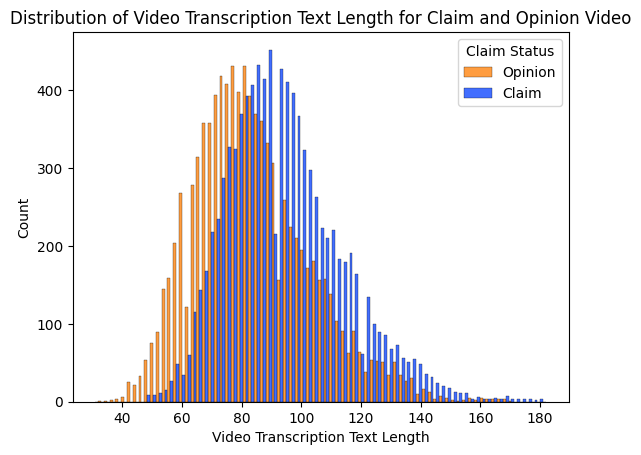

In [107]:
# Visualize the distribution of `text_length` for claims and opinions
sns.histplot(data=df, stat="count", multiple="dodge", x="text_length",
             kde=False, palette="bright", hue="claim_status",
             element="bars", legend=True)
plt.xlabel("Video Transcription Text Length")
plt.ylabel("Count")
plt.title("Distribution of Video Transcription Text Length for Claim and Opinion Video")
plt.legend(title='Claim Status', labels=['Opinion', 'Claim'])

#plt.savefig('Distribution of Video Transcription Text Length for Claim and Opinion Video', dpi=300)
plt.show()

The distribution of video transcription text lengths shows that claim videos tend to have longer transcriptions compared to opinion videos.

#### Correlation among variables


In [108]:
# Drop the columns that are not relevant to the current analysis
df_cor = df.drop(['#', 'video_id', 'likes_per_view', 'comment_per_view', 'share_per_view'], axis = 1)

In [109]:
# Construct a correlation matrix 
df_cor.corr(numeric_only=True)

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
video_duration_sec,1.000000,0.008481,0.011567,0.011560,0.013078,0.000615,-0.001580
video_view_count,0.008481,1.000000,0.804322,0.665635,0.664222,0.554172,0.230212
video_like_count,0.011567,0.804322,1.000000,0.825789,0.823554,0.687185,0.180193
video_share_count,0.011560,0.665635,0.825789,1.000000,0.679910,0.574632,0.147223
video_download_count,0.013078,0.664222,0.823554,0.679910,1.000000,0.832464,0.146382
video_comment_count,0.000615,0.554172,0.687185,0.574632,0.832464,1.000000,0.129659
text_length,-0.001580,0.230212,0.180193,0.147223,0.146382,0.129659,1.000000


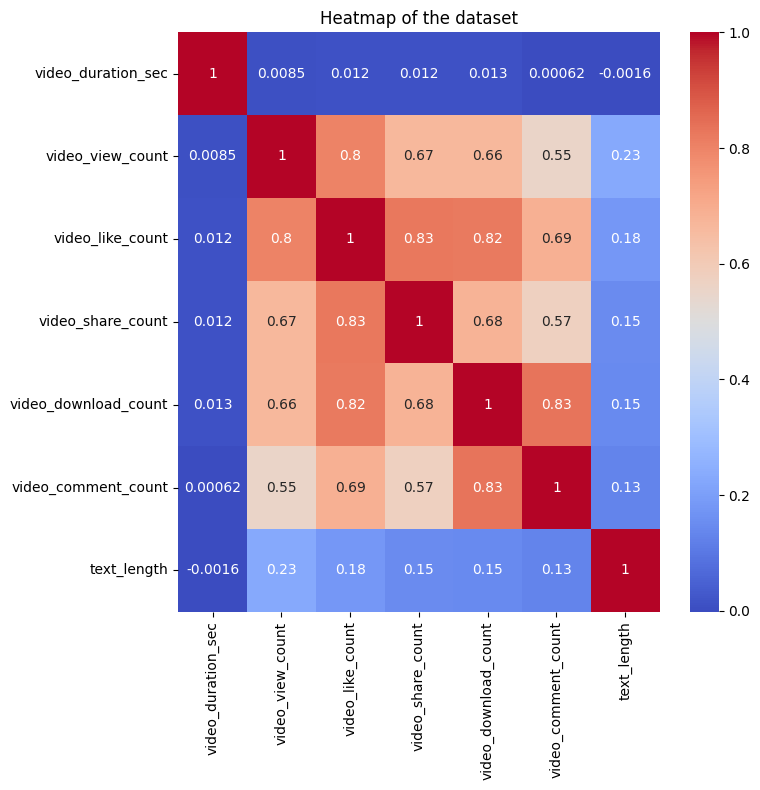

In [110]:
# Create a heatmap to visualize the correlation
plt.show()
plt.figure(figsize=(8, 8))
sns.heatmap(
    df_cor[['video_duration_sec', 'claim_status', 'author_ban_status', 'video_view_count', 
            'video_like_count', 'video_share_count', 'video_download_count', 'video_comment_count', 'text_length']]
    .corr(numeric_only=True), 
    annot=True, 
    cmap='coolwarm')

plt.title("Heatmap of the dataset")
plt.tight_layout()
plt.savefig('Correlation Heatmap', dpi=300)
plt.show()

The heatmap visualizes the correlations between different video attributes. It reveals that engagement metrics, such as view count, like count, and share count, are highly correlated with each other.

# III. Hypothesis testing
After the EDA, several hypothesis tests were conducted to further validate the differences between claim videos and opinion videos.

#### Comparison of Video Duration (Seconds)
**$H_0$** : There is no difference in video duration between claim videos and opinion videos.

**$H_A$** : There is difference in video duration between claim videos and opinion videos.

We choose 5% as the significance level.


In [111]:
# Remind ourselves of the variables we currently have
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comment_per_view,share_per_view,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000000,0.000702,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.004855,0.135111,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.000365,0.003168,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,0.548459,0.001335,0.079569,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,0.622910,0.002706,0.073175,128


In [112]:
claim = df[df['claim_status'] == 'claim']
opinion = df[df['claim_status'] == 'opinion']

# Conduct a two-sample t-test to video duration
claim_duration = claim ['video_duration_sec']
opinion_duration = opinion['video_duration_sec']

result_dur = stats.ttest_ind(a = claim_duration, b = opinion_duration, equal_var=False)
statistic_dur = result_dur.statistic
pvalue_dur = result_dur.pvalue

result_dur

TtestResult(statistic=np.float64(0.540687571628616), pvalue=np.float64(0.5887292599632779), df=np.float64(19073.92975301691))

The p-value is 0.589, which is greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis, indicating that there is no statistically significant difference between claim videos and opinion videos.

#### Comparison of other attibutes

In [113]:
# Apply the same procedure to other attributes

# View count
claim_vc = claim['video_view_count']
opinion_vc = opinion['video_view_count']
result_vc = stats.ttest_ind(a = claim_vc, b = opinion_vc, equal_var=False)
statistic_vc = result_vc.statistic
pvalue_vc = result_vc.pvalue

# Like count
claim_lc = claim['video_like_count']
opinion_lc = opinion['video_like_count']
result_lc = stats.ttest_ind(a = claim_lc, b = opinion_lc, equal_var=False)
statistic_lc = result_lc.statistic
pvalue_lc = result_lc.pvalue

# Comment count
claim_cc = claim['video_comment_count']
opinion_cc = opinion['video_comment_count']
result_cc = stats.ttest_ind(a = claim_cc, b = opinion_cc, equal_var=False)
statistic_cc = result_cc.statistic
pvalue_cc = result_cc.pvalue

# Share count
claim_sc = claim['video_share_count']
opinion_sc = opinion['video_share_count']
result_sc = stats.ttest_ind(a = claim_sc, b = opinion_sc, equal_var=False)
statistic_sc = result_sc.statistic
pvalue_sc = result_sc.pvalue

# Text length
claim_tl = claim['text_length']
opinion_tl = opinion['text_length']
result_tl = stats.ttest_ind(a = claim_tl, b = opinion_tl, equal_var=False)
statistic_tl = result_tl.statistic
pvalue_tl = result_tl.pvalue

In [114]:
# Construct a summary table
test_result_table = pd.DataFrame({
    'Test': ['Duration Time', 'View Count', 'Like Count', 'Comment Count', 'Share Count', 'Text Length'],
    'T statistic': [statistic_dur, statistic_vc, statistic_lc, statistic_cc, statistic_sc, statistic_tl],
    'P-Value': [pvalue_dur, pvalue_vc, pvalue_lc, pvalue_cc, pvalue_sc, pvalue_tl],
}).reset_index(drop = True)

test_result_table

,Test,T statistic,P-Value
0,Duration Time,0.540688,0.588729
1,View Count,166.888578,0.000000
2,Like Count,109.742253,0.000000
3,Comment Count,66.341119,0.000000
4,Share Count,82.923414,0.000000
5,Text Length,44.385499,0.000000


The results from the hypothesis tests indicate that view count, like count, comment count, and share count are all significantly different between claim videos and opinion videos. Interestingly, significant differences were also found in the transcription text length between claim videos and opinion videos.

# IV. Machine Learning

In this section, two machine learning models, a random forest model and an XGBoost model, will be built to predict whether a video contains claim or opinion content. First, the data will be split into training, validation, and test sets with proportions of 60%, 20%, and 20%, respectively. We will then fit the models and tune the hyperparameters using the training set. After that, the validation set will be used to evaluate the models and select the one with better performance. Finally, the selected model’s performance will be assessed using the test set.

### Using train data to fit two models

In [115]:
# Setup predictors X and target variable y
X = df.copy()
X['claim_status'] = X['claim_status'].replace({'opinion': 0, 'claim': 1})
y = X['claim_status']

# Dummy encode remaining categorical values
X = pd.get_dummies(X,columns=['verified_status', 'author_ban_status'], drop_first=True)
X = X.drop(['#','claim_status',  'video_id', 'video_transcription_text', 'likes_per_view', 'comment_per_view', 'share_per_view'], axis=1)

X.head()

/var/folders/8b/8kqdzlwx5j1f14cwsq73fx9w0000gn/T/ipykernel_59808/2041539478.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['claim_status'] = X['claim_status'].replace({'opinion': 0, 'claim': 1})


,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,31,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,25,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,19,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


In [116]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Split the validation set from the training set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)

#### **Random Forest Model**

In [117]:
# Build the model
rf = RandomForestClassifier(random_state = 517)

# Select hyperparameter options to tune

cv_params = {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6],
             'max_samples': [0.7],
             'min_samples_leaf': [1, 2],
             'min_samples_split': [2, 3],
             'n_estimators': [75, 100, 200]
             }
# Select scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Construct GridSearchCV object to find the optimized hyperparameter (based on recall score)
rf_cv = GridSearchCV(rf, cv_params, scoring = scoring, cv = 5,  refit='recall')

In [118]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: user 2min 50s, sys: 2.97 s, total: 2min 53s
Wall time: 2min 55s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=517),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [119]:
# Best recall score
rf_cv.best_score_

np.float64(0.991026002107111)

In [120]:
# Best parameters
rf_cv.best_params_

{'max_depth': 5,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 75}

#### **XGBoost model**

In [121]:
# Build the model
xgb = XGBClassifier(objective='binary:logistic', random_state = 517)

# Select hyperparameter options to tune

cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# Select scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Construct GridSearchCV object to find the optimized hyperparameter (based on recall score)
xgb_cv = GridSearchCV(xgb, cv_params, scoring = scoring, cv = 5,  refit='recall')

In [122]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: user 35.4 s, sys: 53.4 s, total: 1min 28s
Wall time: 42.1 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=517, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [123]:
# Best recall score
xgb_cv.best_score_

np.float64(0.9898176171763818)

In [124]:
# Best parameters
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 300}

### Evaluate Models Using Validation Data

#### **Random Forest**

In [125]:
# Use the best estimator from the random forest model 
y_pred_rf = rf_cv.best_estimator_.predict(X_val)

In [126]:
recall = recall_score(y_val, y_pred_rf)
print("Recall score (Validation Set Random Forest):", recall)

Recall score (Validation Set Random Forest): 0.9896103896103896


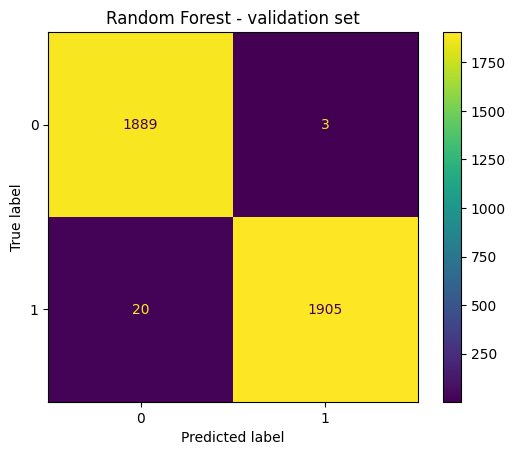

In [127]:
# Create a confusion matrix (random forest model)
log_cm = confusion_matrix(y_val, y_pred_rf)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()
plt.title('Random Forest - validation set');

plt.savefig('Rf validation cm', dpi=300)
plt.show()

In [128]:
# Classifcation report (random forest model)
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred_rf, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1892
       claim       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



#### **XGBoost**

In [129]:
# Use the best estimator from the XGBoost model
y_pred_xgb = xgb_cv.best_estimator_.predict(X_val)

In [130]:
recall = recall_score(y_val, y_pred_xgb)
print("Recall score (Validation Set XGBoost):", recall)

Recall score (Validation Set XGBoost): 0.9885714285714285


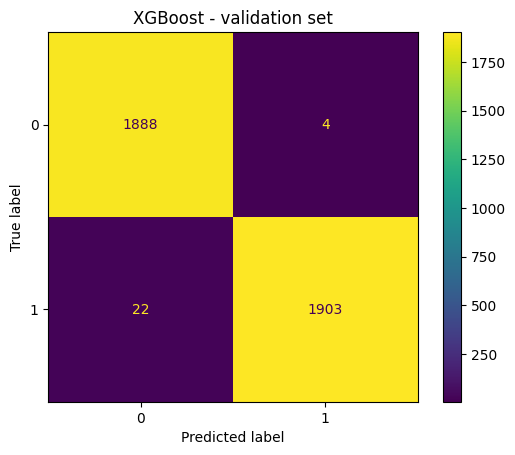

In [131]:
# Create a confusion matrix (XGBoost model)
log_cm = confusion_matrix(y_val, y_pred_xgb)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()
plt.title('XGBoost - validation set')

plt.savefig('XGB validation cm', dpi=300)
plt.show()

In [132]:
# Classifcation report (XGBoost model)
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred_xgb, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1892
       claim       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



Based on recall scores, the random forest model (Recall: 0.9896) performs slightly better than the XGBoost model(Recall: 0.9886). Therefore, we select the random forest model to make predictions on the test data.

### Using random forest model to predict on test data

In [133]:
# Use random forest model to predict on test data
y_pred_rf_test = rf_cv.best_estimator_.predict(X_test)

In [134]:
recall = recall_score(y_test, y_pred_rf_test)
print("Recall score (Test Set Random Forest):", recall)

accuracy = accuracy_score(y_test, y_pred_rf_test)
print("Accuracy score (Test Set Random Forest):", accuracy)

Recall score (Test Set Random Forest): 0.9920592906299629
Accuracy score (Test Set Random Forest): 0.9960702122085408


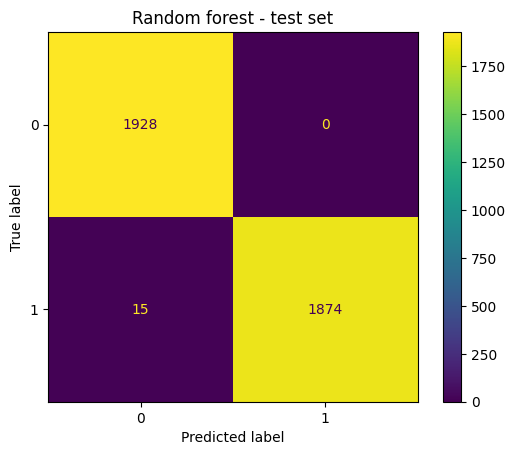

In [135]:
# Confusion matrix
log_cm = confusion_matrix(y_test, y_pred_rf_test)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()
plt.title('Random forest - test set');

plt.savefig('RF test cm', dpi=300)
plt.show()

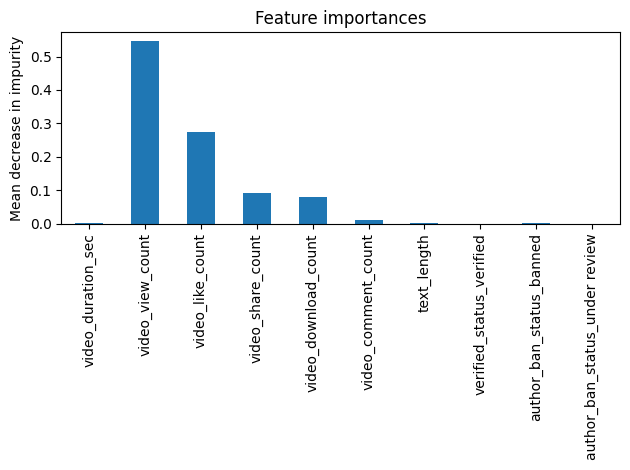

In [137]:
# Create feature importance plot
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')

plt.tight_layout()
plt.savefig('Feature importances', dpi=300)
fig.tight_layout()

The most predictive features are video view count, video like count, and video share and download count. This suggests that engagement metrics are effective predictors of a video’s claim status.

# V. Conclusion
Based on the recall score from the validation set, we selected the random forest model to make predictions on the test set. The results showed that the random forest model performed exceptionally well on test set, achieving a recall score of 99.2% and an accuracy score of 99.6%. The performance indicates that the model will provide accurate predictions for video claim status, significantly improving the workflow efficiency of the content moderation team.